In [2]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss,confusion_matrix
import plotly.express as px  
import sklearn
import math
import copy
import torch.optim as optim

In [3]:
results = pd.read_csv('resultshuffled.csv')   
#pobranie z pliku danych po shuffle

In [4]:
results = results.drop(['Unnamed: 0'], axis = 1)
results

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,NaN,1,2009,1,NaN,0.880000,0.265,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.40,2,2010,1,NaN,NaN,NaN,NaN,NaN,NaN
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.09,5,2011,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,15054047,10.88,2614,0.410156,100,100,1,17.09,NaN,1,2022,1,NaN,NaN,NaN,NaN,NaN,NaN
581273,15054107,10.71,4101,0.421875,100,100,1,17.30,NaN,1,2022,1,NaN,0.593333,0.830,0.984336,2.0,1.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.71,2,2022,2,10.71,0.593333,0.830,0.984336,2.0,1.0
581275,15054126,10.96,1630,0.367188,100,100,1,18.64,NaN,1,2022,1,NaN,0.648333,0.805,0.979275,3.0,0.0


ucinamy wartości odstające

In [5]:
results = results[results.wynik < 12]   #usuniecie wartosci odstajacych
results

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,NaN,1,2009,1,NaN,0.880000,0.265,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.40,2,2010,1,NaN,NaN,NaN,NaN,NaN,NaN
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.09,5,2011,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,15054047,10.88,2614,0.410156,100,100,1,17.09,NaN,1,2022,1,NaN,NaN,NaN,NaN,NaN,NaN
581273,15054107,10.71,4101,0.421875,100,100,1,17.30,NaN,1,2022,1,NaN,0.593333,0.830,0.984336,2.0,1.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.71,2,2022,2,10.71,0.593333,0.830,0.984336,2.0,1.0
581275,15054126,10.96,1630,0.367188,100,100,1,18.64,NaN,1,2022,1,NaN,0.648333,0.805,0.979275,3.0,0.0


# 1. Ucinamy NaN

In [6]:
kol_nan = []
for k in results.columns:
    if results.describe()[k]['count'] < len(results):
        print(k, results.describe()[k]['count'])
        kol_nan.append(k)

wiatr 545534.0
wiek 494971.0
pb_aktualne 546725.0
sb_aktualne 455012.0
Temperature 244500.0
Humidity 244500.0
Pressure 244500.0
Condition 240634.0
Rain 240634.0


In [7]:
results1 = copy.deepcopy(results)
for k in kol_nan:
    results1 = results1[results1[k].isna()==False]
results1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
12,14164603,10.91,3574,0.476562,61,61,1,22.62,10.82,13,2012,4,10.82,0.630000,0.680,0.974542,5.0,0.0
13,14164603,10.91,3574,0.472656,61,61,1,22.62,10.82,14,2012,5,10.82,0.630000,0.680,0.974542,5.0,0.0
18,14164603,11.16,3574,0.253906,61,61,1,24.58,10.82,19,2014,3,11.18,0.695000,0.610,0.978455,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581259,15052984,10.95,3299,0.363281,100,100,1,20.40,10.89,4,2022,4,10.89,0.666667,0.880,0.978128,3.0,0.0
581260,15052984,10.89,3299,0.386719,100,100,1,20.40,10.89,5,2022,5,10.89,0.666667,0.880,0.978128,3.0,0.0
581263,15052991,11.13,3299,0.398437,100,100,1,18.64,10.99,2,2022,2,10.99,0.666667,0.880,0.978128,3.0,0.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.71,2,2022,2,10.71,0.593333,0.830,0.984336,2.0,1.0


In [8]:
#podział na 30% danych
d3 = int(len(results1) * 0.3)
d3

56923

In [9]:
results_train1 = results1[:d3]
results_train1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.09,3,2010,2,11.09,0.676667,0.690,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.09,4,2010,3,11.09,0.676667,0.690,0.975515,5.0,0.0
12,14164603,10.91,3574,0.476562,61,61,1,22.62,10.82,13,2012,4,10.82,0.630000,0.680,0.974542,5.0,0.0
13,14164603,10.91,3574,0.472656,61,61,1,22.62,10.82,14,2012,5,10.82,0.630000,0.680,0.974542,5.0,0.0
18,14164603,11.16,3574,0.253906,61,61,1,24.58,10.82,19,2014,3,11.18,0.695000,0.610,0.978455,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,14227719,11.31,1455,0.351562,183,183,1,24.59,10.90,9,2013,3,11.19,0.723333,0.690,0.970136,5.0,0.0
128651,14227719,11.14,2398,0.355469,183,183,1,24.60,10.90,10,2013,4,11.19,0.630000,0.825,0.975515,5.0,0.0
128652,14227719,11.31,1351,0.269531,183,183,1,24.66,10.90,11,2013,5,11.14,0.593333,0.575,0.981723,5.0,0.0
128657,14227719,11.14,3337,0.371094,183,183,1,27.45,10.90,16,2016,2,11.16,0.666667,0.350,0.982373,5.0,0.0


In [10]:
results_test1 = results1[d3:]
results_test1

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
128663,14227723,10.84,1432,0.398437,183,183,1,19.45,10.82,6,2006,6,10.82,0.666667,0.500,0.975515,5.0,0.0
128664,14227723,10.88,1432,0.406250,183,183,1,19.45,10.82,7,2006,7,10.82,0.666667,0.500,0.975515,5.0,0.0
128665,14227723,10.97,1432,0.414062,183,183,1,19.45,10.82,8,2006,8,10.82,0.666667,0.500,0.975515,5.0,0.0
128666,14227723,10.95,1025,0.433594,183,183,1,19.54,10.82,9,2006,9,10.82,0.583333,0.820,0.952669,3.0,0.0
128669,14227723,10.88,3483,0.507812,183,183,1,20.32,10.70,12,2007,3,10.70,0.546667,0.360,0.961477,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581259,15052984,10.95,3299,0.363281,100,100,1,20.40,10.89,4,2022,4,10.89,0.666667,0.880,0.978128,3.0,0.0
581260,15052984,10.89,3299,0.386719,100,100,1,20.40,10.89,5,2022,5,10.89,0.666667,0.880,0.978128,3.0,0.0
581263,15052991,11.13,3299,0.398437,100,100,1,18.64,10.99,2,2022,2,10.99,0.666667,0.880,0.978128,3.0,0.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.71,2,2022,2,10.71,0.593333,0.830,0.984336,2.0,1.0


In [11]:
wynik_train1 = results_train1['wynik']
wynik_train1

2         11.23
3         11.21
12        10.91
13        10.91
18        11.16
          ...  
128650    11.31
128651    11.14
128652    11.31
128657    11.14
128660    11.11
Name: wynik, Length: 56923, dtype: float64

In [12]:
wynik_test1 = results_test1['wynik']
wynik_test1

128663    10.84
128664    10.88
128665    10.97
128666    10.95
128669    10.88
          ...  
581259    10.95
581260    10.89
581263    11.13
581274    10.79
581276    10.92
Name: wynik, Length: 132821, dtype: float64

In [13]:
results_train1 = results_train1.drop(['wynik'], axis = 1)
results_test1 = results_test1.drop(['wynik'], axis = 1)

# 2. NaN na średnie

In [14]:
results2 = copy.deepcopy(results)

In [15]:
for i, k in enumerate(kol_nan):
    if i < len(kol_nan)-2:    #srednia wartosc
        m = results2[k].mean()
    else:                   #najczestsza wartosc
        m= float(results2[k].mode())
    results2[k].fillna(value=m, inplace=True)
results2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,10.605709,1,2009,1,10.698375,0.880000,0.265000,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.400000,2,2010,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.090000,3,2010,2,11.090000,0.676667,0.690000,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.090000,4,2010,3,11.090000,0.676667,0.690000,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.090000,5,2011,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,15054047,10.88,2614,0.410156,100,100,1,17.09,10.605709,1,2022,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581273,15054107,10.71,4101,0.421875,100,100,1,17.30,10.605709,1,2022,1,10.698375,0.593333,0.830000,0.984336,2.0,1.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.710000,2,2022,2,10.710000,0.593333,0.830000,0.984336,2.0,1.0
581275,15054126,10.96,1630,0.367188,100,100,1,18.64,10.605709,1,2022,1,10.698375,0.648333,0.805000,0.979275,3.0,0.0


In [16]:
#podział na 30% danych
d32 = int(len(results2) * 0.3)
d32

174115

In [17]:
results_train2 = results2[:d32]
results_train2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
0,14164603,11.40,2546,0.261719,176,61,0,19.55,10.605709,1,2009,1,10.698375,0.880000,0.265000,0.964748,5.0,0.0
1,14164603,11.09,1773,0.433594,61,61,1,20.51,11.400000,2,2010,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
2,14164603,11.23,3574,0.445312,61,61,1,20.53,11.090000,3,2010,2,11.090000,0.676667,0.690000,0.975515,5.0,0.0
3,14164603,11.21,3574,0.324219,61,61,1,20.53,11.090000,4,2010,3,11.090000,0.676667,0.690000,0.975515,5.0,0.0
4,14164603,10.93,3255,0.460938,64,61,0,21.42,11.090000,5,2011,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174359,14330279,10.73,3348,0.394531,32,32,1,24.10,10.680000,5,2014,3,10.680000,0.666342,0.619175,0.951745,5.0,0.0
174360,14330279,10.69,3359,0.453125,32,32,1,25.12,10.680000,6,2015,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
174361,14330279,10.79,3359,0.386719,32,32,1,25.12,10.680000,7,2015,2,10.690000,0.666342,0.619175,0.951745,5.0,0.0
174362,14330279,11.08,3359,0.347656,32,32,1,25.12,10.680000,8,2015,3,10.690000,0.666342,0.619175,0.951745,5.0,0.0


In [18]:
results_test2 = results2[d32:]
results_test2

,numer,wynik,City,wiatr,kraj_zawodow,kraj_urodz,czy_kraj,wiek,pb_aktualne,nr_start_kariera,rok,nr_start_sezon,sb_aktualne,Temperature,Humidity,Pressure,Condition,Rain
174364,14330279,10.93,2810,0.300781,32,32,1,25.17,10.680000,10,2015,5,10.690000,0.666342,0.619175,0.951745,5.0,0.0
174365,14330279,10.87,2810,0.355469,32,32,1,25.17,10.680000,11,2015,6,10.690000,0.666342,0.619175,0.951745,5.0,0.0
174366,14330279,10.87,3359,0.347656,32,32,1,25.20,10.680000,12,2015,7,10.690000,0.666342,0.619175,0.951745,5.0,0.0
174367,14330279,10.88,3464,0.363281,32,32,1,25.22,10.680000,13,2015,8,10.690000,0.666342,0.619175,0.951745,5.0,0.0
174368,14330279,10.83,3464,0.359375,32,32,1,25.22,10.680000,14,2015,9,10.690000,0.666342,0.619175,0.951745,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581272,15054047,10.88,2614,0.410156,100,100,1,17.09,10.605709,1,2022,1,10.698375,0.666342,0.619175,0.951745,5.0,0.0
581273,15054107,10.71,4101,0.421875,100,100,1,17.30,10.605709,1,2022,1,10.698375,0.593333,0.830000,0.984336,2.0,1.0
581274,15054107,10.79,4101,0.394531,100,100,1,17.30,10.710000,2,2022,2,10.710000,0.593333,0.830000,0.984336,2.0,1.0
581275,15054126,10.96,1630,0.367188,100,100,1,18.64,10.605709,1,2022,1,10.698375,0.648333,0.805000,0.979275,3.0,0.0


In [19]:
wynik_train2 = results_train2['wynik']
wynik_train2

0         11.40
1         11.09
2         11.23
3         11.21
4         10.93
          ...  
174359    10.73
174360    10.69
174361    10.79
174362    11.08
174363    10.83
Name: wynik, Length: 174115, dtype: float64

In [20]:
wynik_test2 = results_test2['wynik']

In [21]:
results_train2 = results_train2.drop(['wynik'], axis = 1)
results_test2 = results_test2.drop(['wynik'], axis = 1)

# Wybieranie najwazniejszych cech

In [22]:
#metoda lasso
def soft_threshold(r, rho, lamda):
    if rho < - lamda:   #porownanie wspolczynnika rho z parametrem lamda
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

def coordinate_descent_lasso(X, Y, num_iters, lamda):
    m, n = X.shape   #ksztalt X
    for i in range(num_iters):
        lista = []
        for j in range(n):
            blad = Y - np.dot(X, np.ones(n))  #wielkosc bledu
            r = np.sum(np.power(X[X.columns[j]], 2))            
            rho = np.sum(np.dot((blad + np.array(X[X.columns[j]])), X[X.columns[j]]))
            lista.append(soft_threshold(r, rho, lamda))
        
    dobre_cechy = []
    for s, k in enumerate(lista):
        if k != 0:   #do dobrych cech wybierane sa tylko te cechy, ktorych wartosc jest > 0, 
                       #czyli spelnily warunek rho >  lamda lub rho < - lamda
            dobre_cechy.append(X.columns[s])
    return dobre_cechy

In [23]:
#cechy_lasso = coordinate_descent_lasso(results_train2, wynik_train2, 20, 8e13)
cechy_lasso = coordinate_descent_lasso(results_train2, wynik_train2, 20, 1e12)   #piec najbardziej, wszystkie NaN = srednia
print('cechy lasso:', cechy_lasso)

cechy lasso: ['numer', 'City', 'kraj_zawodow', 'kraj_urodz', 'czy_kraj', 'wiek', 'pb_aktualne', 'nr_start_kariera', 'rok', 'nr_start_sezon', 'sb_aktualne', 'Temperature', 'Humidity', 'Pressure', 'Condition']


In [24]:
set(list(results_train1.columns)) - set(cechy_lasso)   #dwie najmniej istotne cechy - usuniecie NaN

{'Rain', 'wiatr'}

In [25]:
cechy_lasso   #piec najbardziej istotnych cech - usuniecie NaN

['numer',
 'City',
 'kraj_zawodow',
 'kraj_urodz',
 'czy_kraj',
 'wiek',
 'pb_aktualne',
 'nr_start_kariera',
 'rok',
 'nr_start_sezon',
 'sb_aktualne',
 'Temperature',
 'Humidity',
 'Pressure',
 'Condition']

In [26]:
set(list(results_train1.columns)) - set(cechy_lasso)   #dwie najmniej istotne cechy, wszystkie, NaN = srednia

{'Rain', 'wiatr'}

In [27]:
cechy_lasso   #piec najbardziej istotnych cech wszystkie, NaN = srednia

['numer',
 'City',
 'kraj_zawodow',
 'kraj_urodz',
 'czy_kraj',
 'wiek',
 'pb_aktualne',
 'nr_start_kariera',
 'rok',
 'nr_start_sezon',
 'sb_aktualne',
 'Temperature',
 'Humidity',
 'Pressure',
 'Condition']

# Uczenie

In [28]:
x = torch.tensor(results_train1.values, dtype=torch.float)
x_test=torch.tensor(results_test1.values, dtype=torch.float)
y = torch.tensor(wynik_train1.values, dtype=torch.float)
y_test=torch.tensor(wynik_test1.values, dtype=torch.float)

In [29]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.Sigmoid(),
        nn.Linear(100,1)
    )
model.to()

Sequential(
  (0): Linear(in_features=17, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [30]:
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.00975)#, momentum = 0.9)   #lr - learning rate

#lr - zacznie mniejszy np. 10^-3
#0.0095 ->78%

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  2768.2898283125432
Loss test: 0.57559729
Total training loss:  2630.280246288453
Loss test: 0.57560021
Total training loss:  2630.280132868049
Loss test: 0.57559586
Total training loss:  2630.2801499376874
Loss test: 0.57559586
Total training loss:  2630.2801908137953
Loss test: 0.57559729
Total training loss:  2630.280068182853
Loss test: 0.57559586
Total training loss:  2630.280148361954
Loss test: 0.57559443
Total training loss:  2630.280146525226
Loss test: 0.57559729
Total training loss:  2630.2801730226647
Loss test: 0.57559443
Total training loss:  2630.2801694428545
Loss test: 0.57559878
Total training loss:  2630.2801974375952
Loss test: 0.57559586
Total training loss:  2630.2802659687013
Loss test: 0.57559586
Total training loss:  2630.280007830461
Loss test: 0.57559729
Total training loss:  2630.2802263152607
Loss test: 0.57559729
Total training loss:  2630.2801479117097
Loss test: 0.57559729
Total training loss:  2630.280004549816
Loss test: 0.57559586

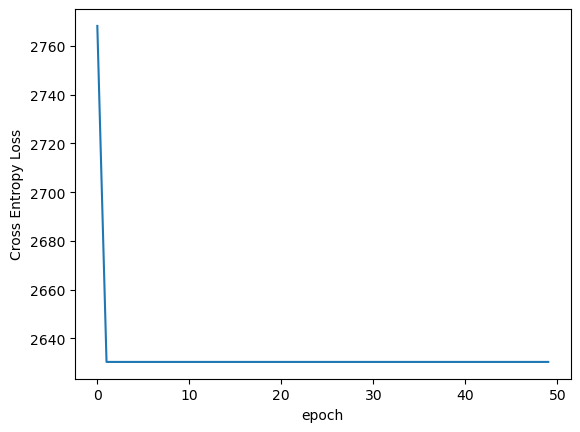

In [31]:
epochs=50
losses=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses)#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

Średnia, Min, Max, SSE, MSE, RMSE i R SQUARED

In [32]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk))
print('Min wart. przewidziana: ',min(predyk))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk,q=17,precision=0)

0.7136482616868401
sredni blad: 0.15826270008276475
SSE: 11004.126523687752
MSE: 0.1933159974647814
RMSE: 0.4396771514017773
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.6899995803833
Max wart. przewidziana:  12.219978332519531
Min wart. przewidziana:  9.487396240234375
0.5936309943375009


[(11.06, 12.22], (11.06, 12.22], (11.06, 12.22], (10.83, 10.89], (10.89, 10.96], ..., (11.06, 12.22], (11.06, 12.22], (11.06, 12.22], (11.06, 12.22], (11.06, 12.22]]
Length: 56923
Categories (17, interval[float64, right]): [(9.48, 10.23] < (10.23, 10.32] < (10.32, 10.39] < (10.39, 10.45] ... (10.83, 10.89] < (10.89, 10.96] < (10.96, 11.06] < (11.06, 12.22]]

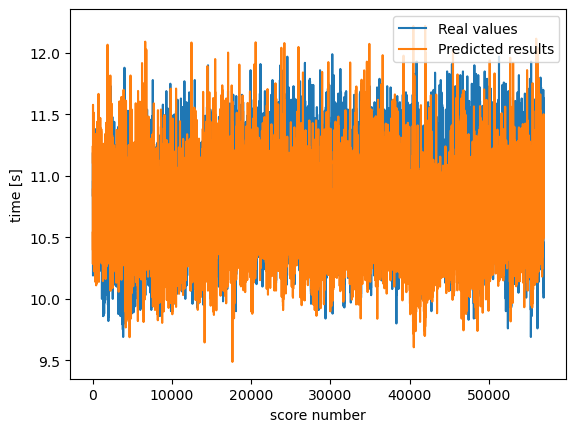

In [33]:
plt.plot(wart, label='Real values')
plt.plot(predyk, label = 'Predicted results')
plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MODEL #2

In [34]:
model = nn.Sequential(
        nn.Linear(17, 64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.Sigmoid(),
        nn.Linear(256,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  2096.8665201123085
Loss test: 0.64500117
Total training loss:  1835.6047204979322
Loss test: 0.64500117
Total training loss:  1835.604812242862
Loss test: 0.64500272
Total training loss:  1835.6047435126611
Loss test: 0.64500117
Total training loss:  1835.6048737739447
Loss test: 0.64500117
Total training loss:  1835.604838817304
Loss test: 0.64500117
Total training loss:  1835.6047139506718
Loss test: 0.64500117
Total training loss:  1835.6047093694478
Loss test: 0.64499968
Total training loss:  1835.6046972744534
Loss test: 0.64500272
Total training loss:  1835.604770546137
Loss test: 0.64499968
Total training loss:  1835.6047356014105
Loss test: 0.64500117
Total training loss:  1835.6048306318062
Loss test: 0.64500117
Total training loss:  1835.6047508017555
Loss test: 0.64500272
Total training loss:  1835.6048110826168
Loss test: 0.64500117
Total training loss:  1835.6047285007817
Loss test: 0.64500117
Total training loss:  1835.6048672750576
Loss test: 0.6450

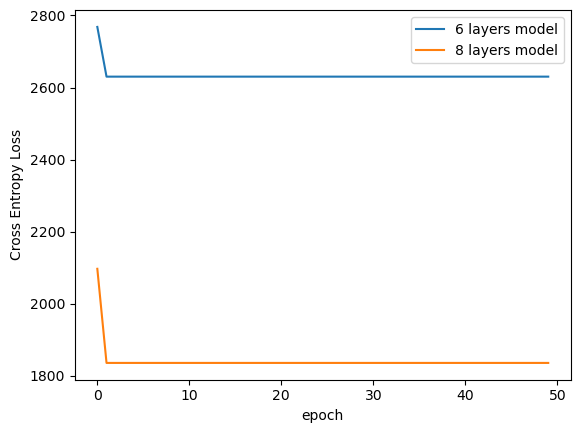

In [35]:

losses2=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses2.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='6 layers model')
plt.plot(range(epochs), losses2, label='8 layers model')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

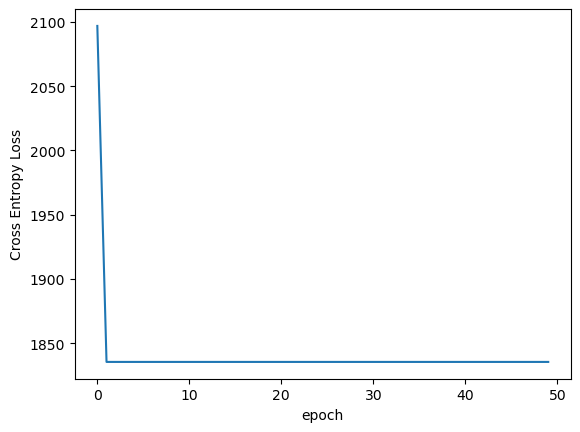

In [36]:
plt.plot(range(epochs), losses2, label='8 layers model')#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk2 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk2.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk2)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk2))
print('Min wart. przewidziana: ',min(predyk2))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk2,q=17,precision=0)

0.779860513325018
sredni blad: 0.1344510328848636
SSE: 9392.697794164218
MSE: 0.16500707612325805
RMSE: 0.40621063024403736
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.6899995803833
Max wart. przewidziana:  11.467086791992188
Min wart. przewidziana:  9.849658966064453
0.5936309943375009


[(10.96, 11.47], (10.96, 11.47], (10.96, 11.47], (10.96, 11.47], (10.96, 11.47], ..., (10.96, 11.47], (10.96, 11.47], (10.96, 11.47], (10.96, 11.47], (10.96, 11.47]]
Length: 56923
Categories (17, interval[float64, right]): [(9.84, 10.3] < (10.3, 10.39] < (10.39, 10.45] < (10.45, 10.5] ... (10.8, 10.84] < (10.84, 10.88] < (10.88, 10.96] < (10.96, 11.47]]

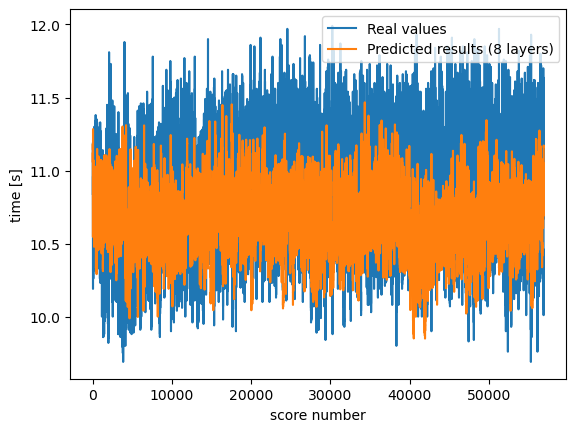

In [38]:
plt.plot(wart, label='Real values')
plt.plot(predyk2, label = 'Predicted results (8 layers)')
plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MODEL #3

In [39]:
model = nn.Sequential(
        nn.Linear(17, 64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,512),
        nn.Sigmoid(),
        nn.Linear(512,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  2021.850987192207
Loss test: 0.68939233
Total training loss:  1862.6846776533002
Loss test: 0.68939072
Total training loss:  1862.6846166468486
Loss test: 0.68938911
Total training loss:  1862.6846418280484
Loss test: 0.68938756
Total training loss:  1862.6846794831827
Loss test: 0.68938911
Total training loss:  1862.6847347350058
Loss test: 0.68938911
Total training loss:  1862.684670415354
Loss test: 0.68939072
Total training loss:  1862.6846176602967
Loss test: 0.68938756
Total training loss:  1862.6846389675047
Loss test: 0.68938756
Total training loss:  1862.6846225195995
Loss test: 0.68938756
Total training loss:  1862.6846321360426
Loss test: 0.68938595
Total training loss:  1862.684714404937
Loss test: 0.68938911
Total training loss:  1862.6847078888932
Loss test: 0.68939072
Total training loss:  1862.6846055507021
Loss test: 0.68939072
Total training loss:  1862.6848181984424
Loss test: 0.68938911
Total training loss:  1862.684786208487
Loss test: 0.68939

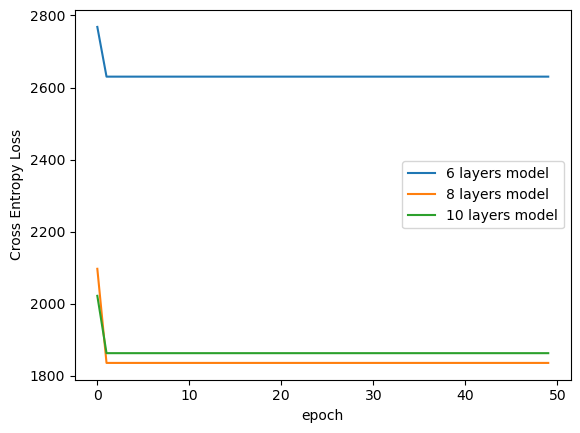

In [40]:

losses3=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses3.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='6 layers model')
plt.plot(range(epochs), losses2, label='8 layers model')#shows plot of the presented system
plt.plot(range(epochs), losses3, label='10 layers model')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

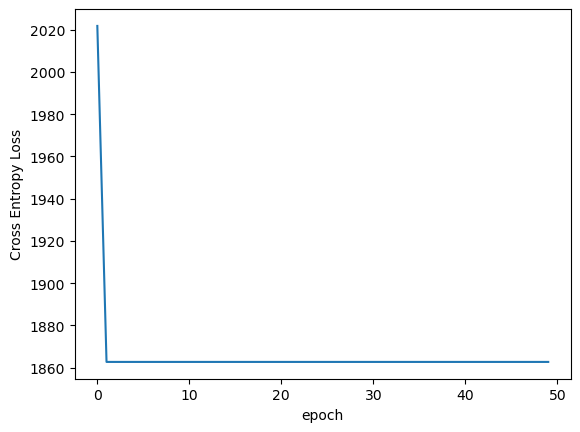

In [41]:
plt.plot(range(epochs), losses3, label='10 layers model')#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

In [42]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk3 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk3.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk3)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk3))
print('Min wart. przewidziana: ',min(predyk3))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk3,q=17,precision=0)

0.7812659206296225
sredni blad: 0.13429788841755666
SSE: 9804.0956892238
MSE: 0.17223434620845351
RMSE: 0.4150112603393473
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.6899995803833
Max wart. przewidziana:  11.566508293151855
Min wart. przewidziana:  9.777739524841309
0.5936309943375009


[(10.99, 11.57], (10.99, 11.57], (10.99, 11.57], (10.99, 11.57], (10.91, 10.99], ..., (10.99, 11.57], (10.99, 11.57], (10.99, 11.57], (10.99, 11.57], (10.99, 11.57]]
Length: 56923
Categories (17, interval[float64, right]): [(9.77, 10.28] < (10.28, 10.37] < (10.37, 10.43] < (10.43, 10.48] ... (10.81, 10.85] < (10.85, 10.91] < (10.91, 10.99] < (10.99, 11.57]]

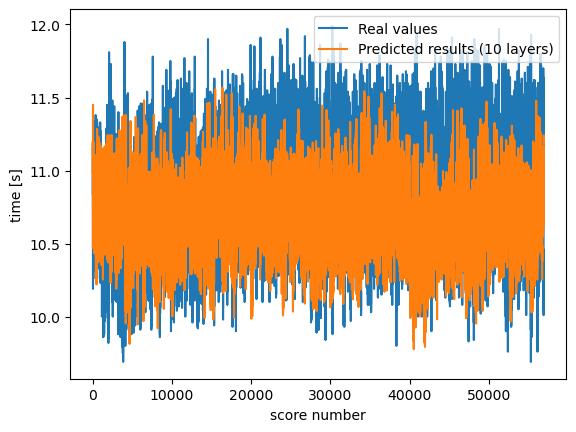

In [43]:
plt.plot(wart, label='Real values')
plt.plot(predyk3, label = 'Predicted results (10 layers)')

plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')

MEAN INSTEAD OF NULL ON 6 layers

In [44]:
x = torch.tensor(results_train2.values, dtype=torch.float)
x_test=torch.tensor(results_test2.values, dtype=torch.float)
y = torch.tensor(wynik_train2.values, dtype=torch.float)
y_test=torch.tensor(wynik_test2.values, dtype=torch.float)

In [45]:
model = nn.Sequential(
        nn.Linear(17, 20),
        nn.ReLU(),
        nn.Linear(20,100),
        nn.Sigmoid(),
        nn.Linear(100,1)
    )
model.to()
criterion = torch.nn.MSELoss()  #zmienic kryterium
optimizer = optim.SGD(model.parameters(), lr = 0.000975)#, momentum = 0.9)   #lr - learning rate

c:\Users\marci\.julia\conda\3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Total training loss:  6798.636835507123
Loss test: 0.36156541
Total training loss:  6214.391034625045
Loss test: 0.36156428
Total training loss:  6214.391066591605
Loss test: 0.36156428
Total training loss:  6214.39111962777
Loss test: 0.36156541
Total training loss:  6214.39140612722
Loss test: 0.36156657
Total training loss:  6214.391057233311
Loss test: 0.36156428
Total training loss:  6214.391266640229
Loss test: 0.36156428
Total training loss:  6214.39136946554
Loss test: 0.36156541
Total training loss:  6214.391087410488
Loss test: 0.36156657
Total training loss:  6214.3912683096605
Loss test: 0.36156657
Total training loss:  6214.3912083779915
Loss test: 0.36156657
Total training loss:  6214.391229164141
Loss test: 0.36156541
Total training loss:  6214.39114873402
Loss test: 0.36156657
Total training loss:  6214.39115417857
Loss test: 0.36156541
Total training loss:  6214.391268261047
Loss test: 0.36156428
Total training loss:  6214.391239836153
Loss test: 0.36156541
Total train

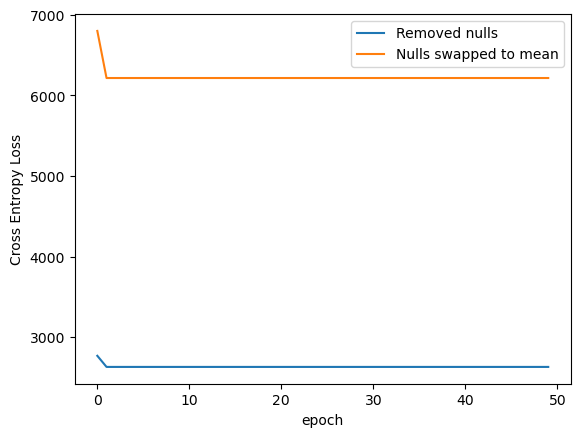

In [46]:

losses2=[]
for epoch in range(epochs):
    totalLoss = 0
    pred_wart = []
    for i in range(len(x)):
        ypred = model(x[i])
        y_pred_test=model(x_test[i])
        pred_wart.append(y_pred_test)
        loss = criterion(ypred, y[i])
        totalLoss+=loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses2.append(totalLoss)
    print('Total training loss: ', totalLoss)
    with torch.no_grad():
        loss2 = criterion(y_pred_test, y_test[len(x)])
        print(f'Loss test: {loss2:.8f}')
    ##if epoch%50==0 or epoch==0:
        ##print('Total loss: ', totalLoss)

plt.plot(range(epochs), losses, label='Removed nulls')
plt.plot(range(epochs), losses2, label='Nulls swapped to mean')#shows plot of the presented system
plt.legend()
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

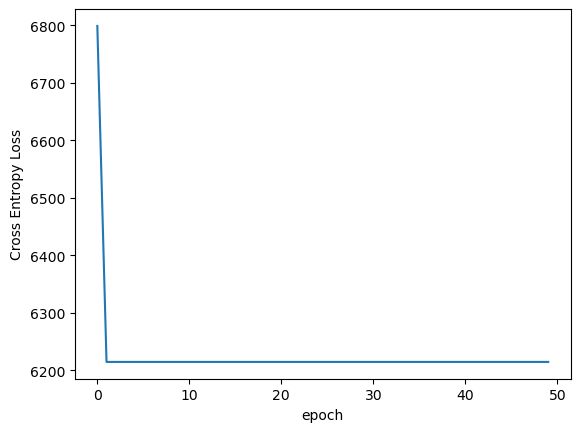

In [47]:
plt.plot(range(epochs), losses2, label='Nulls swapped to mean')#shows plot of the presented system
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')
plt.show()

In [48]:
#sprawdzenie ile predykcji jest mniejszych od danego bledu
good = 0
wart = []
predyk3 = []
suma = 0
for i in range(len(y)):
    wart.append(y_test[i].item())
    predyk3.append(pred_wart[i].item())
    suma += abs(y[i].item() - pred_wart[i].item())
    if abs(y[i].item() - pred_wart[i].item()) < 0.2:
        good += 1
print(good/len(y))

print('sredni blad:', suma/len(y)) #Mean Absolute Error
#<0.15 = 0.54 (z wartosciami odstajacymi) 0.48623579221053004, 0.48876552535881806
#obliczanie błędu SSE - suma kwadratów błędu estymacji, błąd średniokwadratowy i RMSE
e = np.array(wart) - np.array(predyk3)
sse = np.sum(np.power(e, 2))
print('SSE:', sse)
mse = np.mean(np.power(e, 2))
print('MSE:', mse)
rmse = np.sqrt(np.mean(np.power(e, 2)))
print('RMSE:', rmse)

print('Max wart. testowa: ',max(wart))
print('Min wart. testowa: ',min(wart))
print('Max wart. przewidziana: ',max(predyk3))
print('Min wart. przewidziana: ',min(predyk3))

model=LinearRegression()
model.fit(x,y)
r_sq=model.score(x,y)
print(r_sq)
pd.qcut(predyk3,q=17,precision=0)

0.7552249949745857
sredni blad: 0.14236547618362386
SSE: 33610.03824584477
MSE: 0.19303355969241462
RMSE: 0.43935584631641655
Max wart. testowa:  11.989999771118164
Min wart. testowa:  9.6899995803833
Max wart. przewidziana:  11.508705139160156
Min wart. przewidziana:  9.856016159057617
0.5558115609371033


[(10.88, 10.95], (10.88, 10.95], (10.95, 11.51], (10.95, 11.51], (10.95, 11.51], ..., (10.88, 10.95], (10.88, 10.95], (10.88, 10.95], (10.83, 10.88], (10.88, 10.95]]
Length: 174115
Categories (17, interval[float64, right]): [(9.85, 10.27] < (10.27, 10.37] < (10.37, 10.44] < (10.44, 10.49] ... (10.79, 10.83] < (10.83, 10.88] < (10.88, 10.95] < (10.95, 11.51]]

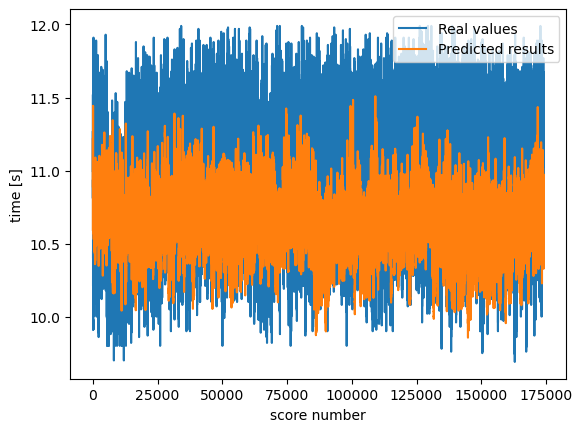

In [49]:
plt.plot(wart, label='Real values')
plt.plot(predyk3, label = 'Predicted results')

plt.xlabel('score number')
plt.ylabel('time [s]')
plt.legend(loc='upper right')